In [3]:
""" import pandas as pd


vcf_file = r"C:\Users\truea\OneDrive\Desktop\GenDR\clinvar\clinvar_real_genomic.vcf"  # replace with your file path
chunks = []
chunk_size = 100000  # number of lines per chunk

# Read file in chunks (skip header lines starting with '#')
reader = pd.read_csv(
    vcf_file,
    sep='\t',
    comment='#',
    header=None,
    chunksize=chunk_size,
    low_memory=False
)

# Loop through each chunk and append to list
for chunk in reader:
    chunks.append(chunk)

# Combine all chunks into a single DataFrame (if memory allows)
vcf_df = pd.concat(chunks, ignore_index=True)

# Assign column names (adjust if you have FORMAT/SAMPLES)
vcf_df.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']

 """

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 38-39: truncated \UXXXXXXXX escape (4102628590.py, line 1)

In [ ]:

pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', None)          # Don't break lines
pd.set_option('display.expand_frame_repr', False)  # Prevent column wrapping

# Optional: prevent truncation of long text in columns like INFO
pd.set_option('display.max_colwidth', None)


In [ ]:
import pandas as pd

# Path to VCF file
vcf_path = r"C:\Users\truea\OneDrive\Desktop\GenDR\clinvar\clinvar_real_genomic.vcf"

# Step 1: Extract the column names
with open(vcf_path, 'r') as f:
    for line in f:
        if line.startswith('#CHROM'):
            colnames = line.lstrip('#').strip().split('\t')
            break

# Step 2: Define function to parse INFO field into a dictionary
def parse_info(info_str):
    try:
        return dict(item.split('=', 1) for item in info_str.split(';') if '=' in item)
    except Exception:
        return {}

# Step 3: Read and process chunks into a full dataframe
chunksize = 100000
reader = pd.read_csv(vcf_path, sep='\t', comment='#', names=colnames, chunksize=chunksize, low_memory=False)

# Combine all processed chunks into one DataFrame
all_chunks = []
for chunk in reader:
    info_dicts = chunk['INFO'].apply(parse_info)
    info_df = pd.json_normalize(info_dicts)
    final_chunk = pd.concat([chunk.drop(columns=['INFO']), info_df], axis=1)
    all_chunks.append(final_chunk)

full_df = pd.concat(all_chunks, ignore_index=True)
full_df.head()


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,ALLELEID,CLNDISDB,CLNDN,...,ONCDISDB,ONCDN,ONCREVSTAT,ONCSCV,SCI,SCIREVSTAT,DBVARID,SCIDISDB,SCIDN,SCISCV
0,1,66926.0,3385321.0,AG,A,.,.,3544463,"Human_Phenotype_Ontology:HP:0000547,MONDO:MOND...",Retinitis_pigmentosa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,69134.0,2205837.0,A,G,.,.,2193183,MedGen:CN169374,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,69308.0,3925305.0,A,G,.,.,4039319,MedGen:CN169374,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,69314.0,3205580.0,T,G,.,.,3374047,MedGen:CN169374,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,69404.0,3925306.0,T,C,.,.,4039320,MedGen:CN169374,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
full_df['CLNHGVS'].unique()

array(['NC_000001.11:g.66927del', 'NC_000001.11:g.69134A>G',
       'NC_000001.11:g.69308A>G', ..., 'NC_012920.1:m.16319G>A',
       'NT_113889.1:g.54175G>A', 'NT_187633.1:g.267335C>T'],
      shape=(3661080,), dtype=object)

In [ ]:
full_df.drop(columns=['QUAL', 'FILTER'], inplace=True)
full_df.head()

,CHROM,POS,ID,REF,ALT,ALLELEID,CLNDISDB,CLNDN,CLNHGVS,CLNREVSTAT,...,ONCDISDB,ONCDN,ONCREVSTAT,ONCSCV,SCI,SCIREVSTAT,DBVARID,SCIDISDB,SCIDN,SCISCV
0,1,66926.0,3385321.0,AG,A,3544463,"Human_Phenotype_Ontology:HP:0000547,MONDO:MOND...",Retinitis_pigmentosa,NC_000001.11:g.66927del,"criteria_provided,_single_submitter",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,69134.0,2205837.0,A,G,2193183,MedGen:CN169374,not_specified,NC_000001.11:g.69134A>G,"criteria_provided,_single_submitter",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,69308.0,3925305.0,A,G,4039319,MedGen:CN169374,not_specified,NC_000001.11:g.69308A>G,"criteria_provided,_single_submitter",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,69314.0,3205580.0,T,G,3374047,MedGen:CN169374,not_specified,NC_000001.11:g.69314T>G,"criteria_provided,_single_submitter",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,69404.0,3925306.0,T,C,4039320,MedGen:CN169374,not_specified,NC_000001.11:g.69404T>C,"criteria_provided,_single_submitter",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7222226 entries, 0 to 7222225
Data columns (total 37 columns):
 #   Column        Dtype  
---  ------        -----  
 0   CHROM         object 
 1   POS           float64
 2   ID            float64
 3   REF           object 
 4   ALT           object 
 5   ALLELEID      object 
 6   CLNDISDB      object 
 7   CLNDN         object 
 8   CLNHGVS       object 
 9   CLNREVSTAT    object 
 10  CLNSIG        object 
 11  CLNSIGSCV     object 
 12  CLNVC         object 
 13  CLNVCSO       object 
 14  GENEINFO      object 
 15  MC            object 
 16  ORIGIN        object 
 17  CLNVI         object 
 18  RS            object 
 19  AF_EXAC       object 
 20  AF_TGP        object 
 21  AF_ESP        object 
 22  CLNSIGCONF    object 
 23  CLNDISDBINCL  object 
 24  CLNDNINCL     object 
 25  CLNSIGINCL    object 
 26  ONC           object 
 27  ONCDISDB      object 
 28  ONCDN         object 
 29  ONCREVSTAT    object 
 30  ONCSCV        obje

In [ ]:
print(full_df.columns)

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'ALLELEID', 'CLNDISDB', 'CLNDN',
       'CLNHGVS', 'CLNREVSTAT', 'CLNSIG', 'CLNSIGSCV', 'CLNVC', 'CLNVCSO',
       'GENEINFO', 'MC', 'ORIGIN', 'CLNVI', 'RS', 'AF_EXAC', 'AF_TGP',
       'AF_ESP', 'CLNSIGCONF', 'CLNDISDBINCL', 'CLNDNINCL', 'CLNSIGINCL',
       'ONC', 'ONCDISDB', 'ONCDN', 'ONCREVSTAT', 'ONCSCV', 'SCI', 'SCIREVSTAT',
       'DBVARID', 'SCIDISDB', 'SCIDN', 'SCISCV'],
      dtype='object')


In [ ]:
full_df["GENEINFO"].unique()

array(['OR4F5:79501', 'LINC01409:105378580',
       'SAMD11:148398|LOC107985728:107985728', ...,
       'CCL4L2:9560|CCL4L1:388372', 'LILRA3:11026',
       'LILRA3:11026|LOC126057115:126057115'],
      shape=(29560,), dtype=object)

In [ ]:
full_df.isnull().sum()

CHROM           3561113
POS             3561113
ID              3561113
REF             3561113
ALT             3561113
ALLELEID        3561113
CLNDISDB        3562423
CLNDN           3562423
CLNHGVS         3561147
CLNREVSTAT      3561760
CLNSIG          3561760
CLNSIGSCV       3562424
CLNVC           3561113
CLNVCSO         3561113
GENEINFO        3582677
MC              3600702
ORIGIN          3583703
CLNVI           4329906
RS              4339327
AF_EXAC         6268665
AF_TGP          6775302
AF_ESP          6810126
CLNSIGCONF      7073460
CLNDISDBINCL    7220762
CLNDNINCL       7220762
CLNSIGINCL      7220762
ONC             7220490
ONCDISDB        7221109
ONCDN           7221109
ONCREVSTAT      7220490
ONCSCV          7221109
SCI             7221580
SCIREVSTAT      7221580
DBVARID         7222073
SCIDISDB        7222199
SCIDN           7222199
SCISCV          7222199
dtype: int64

In [ ]:
df_clean = full_df.dropna(subset=['CHROM', 'POS', 'REF', 'ALT'])


In [ ]:
df_clean.head()

,CHROM,POS,ID,REF,ALT,ALLELEID,CLNDISDB,CLNDN,CLNHGVS,CLNREVSTAT,CLNSIG,CLNSIGSCV,CLNVC,CLNVCSO,GENEINFO,MC,ORIGIN,CLNVI,RS,AF_EXAC,AF_TGP,AF_ESP,CLNSIGCONF,CLNDISDBINCL,CLNDNINCL,CLNSIGINCL,ONC,ONCDISDB,ONCDN,ONCREVSTAT,ONCSCV,SCI,SCIREVSTAT,DBVARID,SCIDISDB,SCIDN,SCISCV
0,1,66926.0,3385321.0,AG,A,3544463,"Human_Phenotype_Ontology:HP:0000547,MONDO:MONDO:0019200,MeSH:D012174,MedGen:C0035334,OMIM:268000,OMIM:PS268000,Orphanet:791",Retinitis_pigmentosa,NC_000001.11:g.66927del,"criteria_provided,_single_submitter",Uncertain_significance,SCV005419006,Deletion,SO:0000159,OR4F5:79501,SO:0001627|intron_variant,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,69134.0,2205837.0,A,G,2193183,MedGen:CN169374,not_specified,NC_000001.11:g.69134A>G,"criteria_provided,_single_submitter",Likely_benign,SCV003526545,single_nucleotide_variant,SO:0001483,OR4F5:79501,SO:0001583|missense_variant,1,ClinGen:CA502008,781394307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,69308.0,3925305.0,A,G,4039319,MedGen:CN169374,not_specified,NC_000001.11:g.69308A>G,"criteria_provided,_single_submitter",Uncertain_significance,SCV006120601,single_nucleotide_variant,SO:0001483,OR4F5:79501,SO:0001583|missense_variant,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,69314.0,3205580.0,T,G,3374047,MedGen:CN169374,not_specified,NC_000001.11:g.69314T>G,"criteria_provided,_single_submitter",Uncertain_significance,SCV004995495,single_nucleotide_variant,SO:0001483,OR4F5:79501,SO:0001583|missense_variant,1,ClinGen:CA338197388,2521653848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,69404.0,3925306.0,T,C,4039320,MedGen:CN169374,not_specified,NC_000001.11:g.69404T>C,"criteria_provided,_single_submitter",Uncertain_significance,SCV006120602,single_nucleotide_variant,SO:0001483,OR4F5:79501,SO:0001583|missense_variant,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_clean.info()

NameError: name 'df_clean' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
sns.barplot(data=top_clnsig, y='CLNSIG', x='Count', hue='CLNSIG', palette='Set2', legend=False)

# Add this line to force integer formatting on X-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Top 10 Clinical Significance Annotations')
plt.xlabel('Variant Count')
plt.ylabel('CLNSIG')
plt.tight_layout()
plt.show()


NameError: name 'top_clnsig' is not defined

<Figure size 1200x600 with 0 Axes>

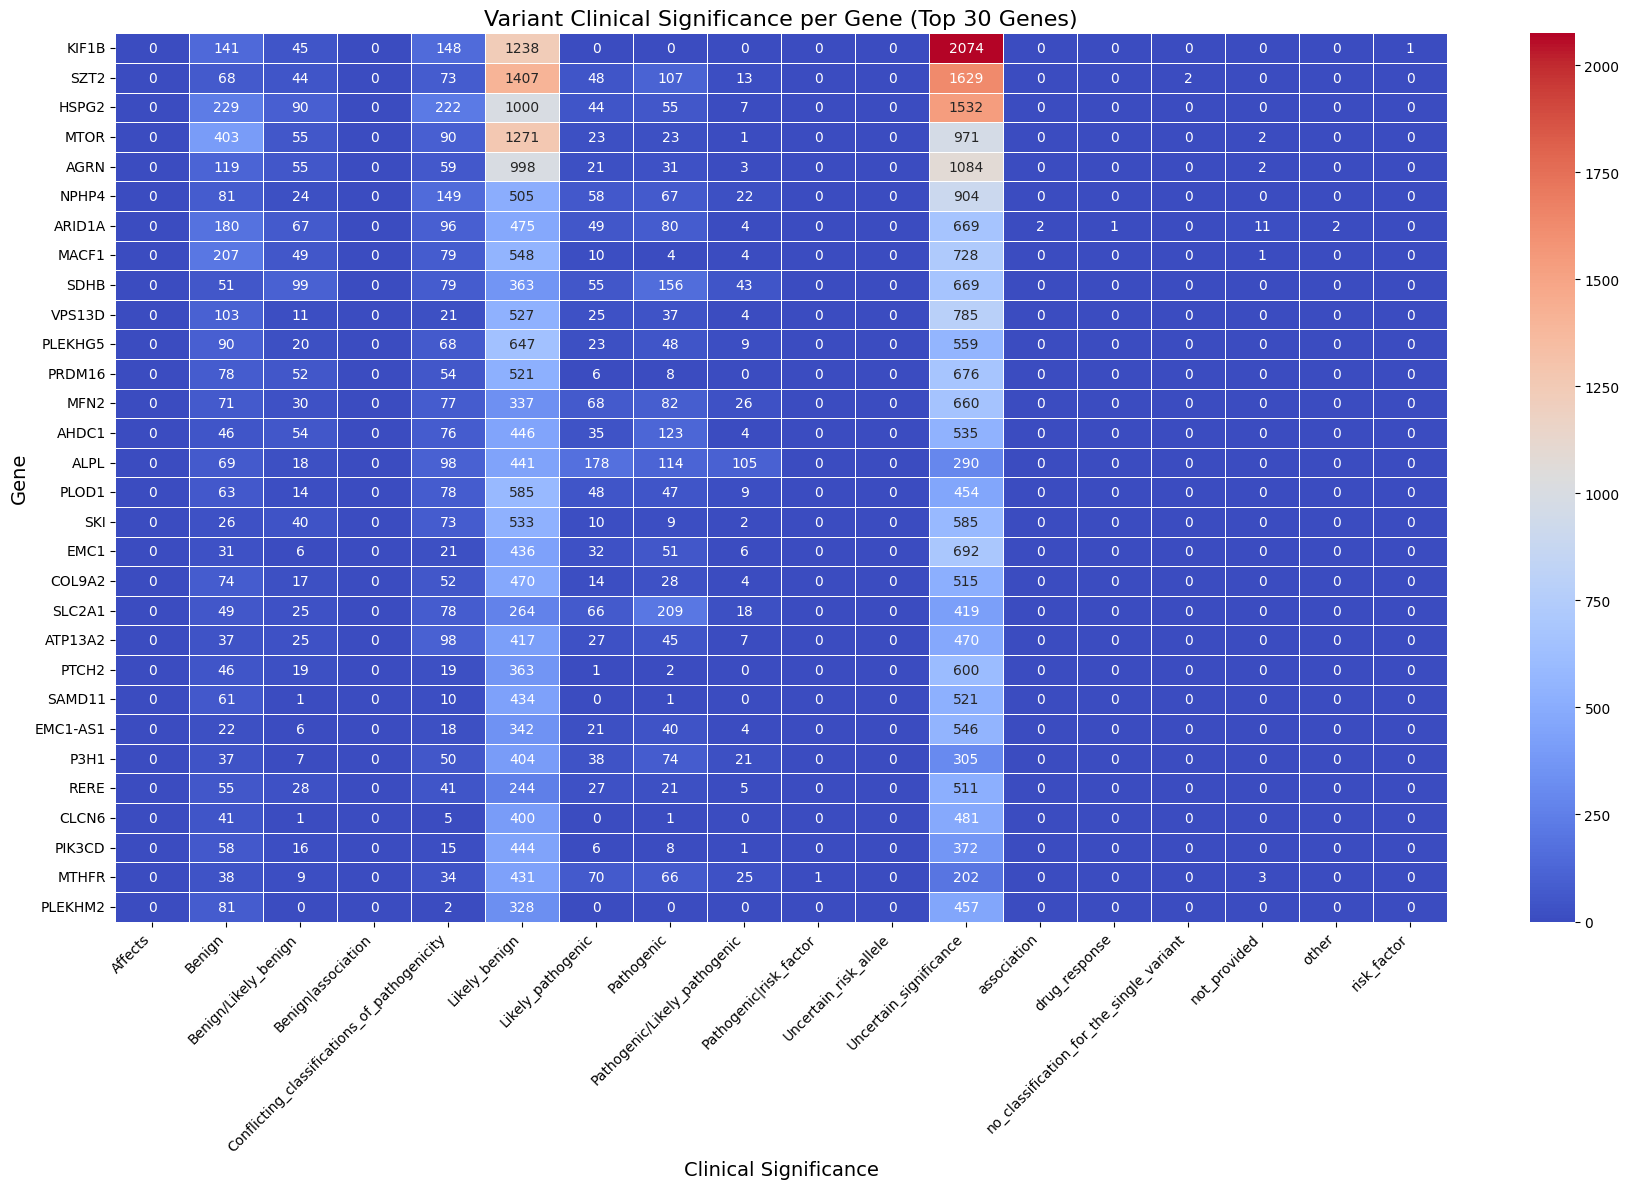

In [ ]:

# Load your cleaned DataFrame (assumes df_clean has GENEINFO and CLNSIG columns)
df_gene = df_clean[['GENEINFO', 'CLNSIG']].dropna()

# Extract gene names from 'GENEINFO' (e.g., "BRCA1:672|TP53:7157" ➝ ['BRCA1', 'TP53'])
df_gene['Gene'] = df_gene['GENEINFO'].apply(lambda x: [i.split(':')[0] for i in x.split('|')])

# Explode to get one row per gene per variant
df_gene = df_gene.explode('Gene')

# Group by Gene and Clinical Significance to count variants
grouped = df_gene.groupby(['Gene', 'CLNSIG']).size().reset_index(name='Count')

# Pivot the data to get Clinical Significance types as columns
pivot = grouped.pivot(index='Gene', columns='CLNSIG', values='Count').fillna(0)

# Select top 30 genes by total variant count
top_genes = pivot.sum(axis=1).sort_values(ascending=False).head(30).index
pivot_top = pivot.loc[top_genes]

# Plot the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(pivot_top, cmap='coolwarm', linewidths=0.5, annot=True, fmt='.0f')
plt.title('Variant Clinical Significance per Gene (Top 30 Genes)', fontsize=16)
plt.xlabel('Clinical Significance', fontsize=14)
plt.ylabel('Gene', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

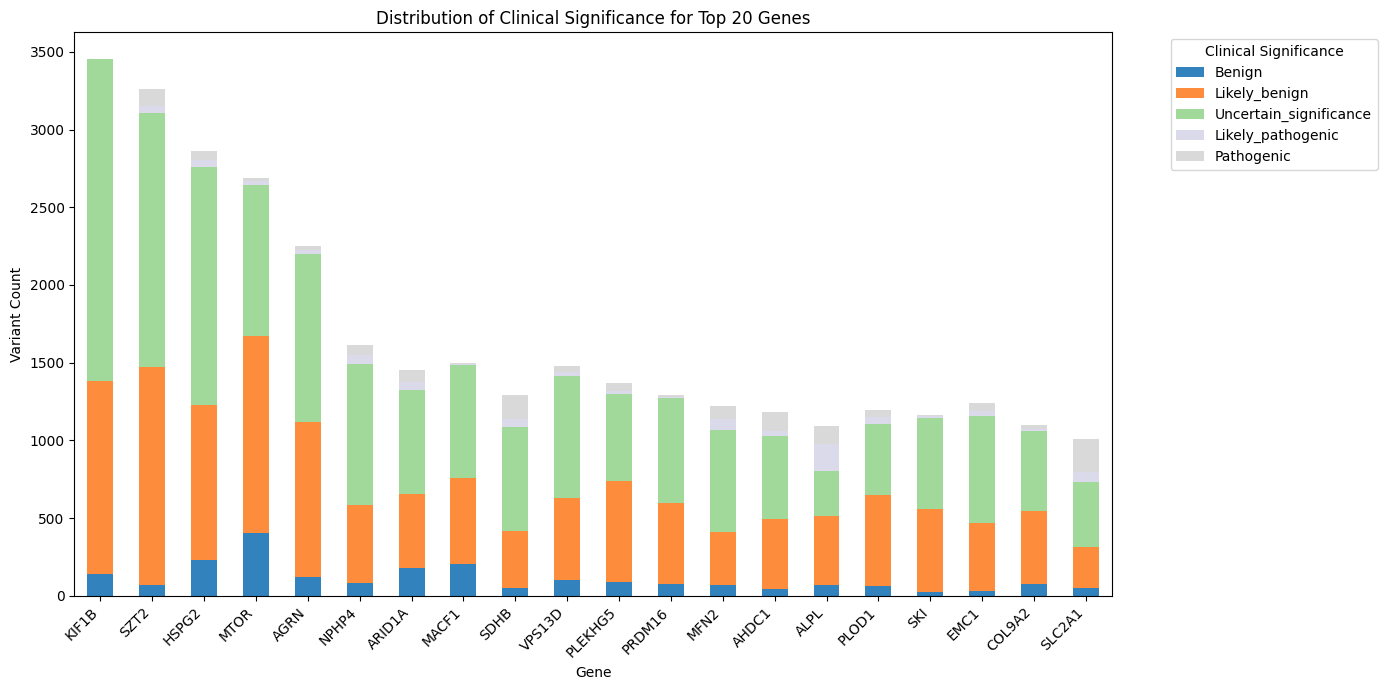

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the already cleaned and exploded dataframe (df_gene)
# Group and count again just in case
grouped = df_gene.groupby(['Gene', 'CLNSIG']).size().reset_index(name='Count')

# Pivot for bar plot (this time keeping full count, not limited to top 30)
pivot_bar = grouped.pivot(index='Gene', columns='CLNSIG', values='Count').fillna(0)

# Optional: focus on top 20 most frequent genes (adjust if needed)
top_genes_bar = pivot_bar.sum(axis=1).sort_values(ascending=False).head(20).index
pivot_bar_top = pivot_bar.loc[top_genes_bar]

# Sort CLNSIG categories in consistent order
clnsig_order = ['Benign', 'Likely_benign', 'Uncertain_significance', 'Likely_pathogenic', 'Pathogenic', 'Conflicting_interpretations_of_pathogenicity']
present_clnsigs = [col for col in clnsig_order if col in pivot_bar_top.columns]

# Plot
pivot_bar_top[present_clnsigs].plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20c')

plt.title('Distribution of Clinical Significance for Top 20 Genes')
plt.xlabel('Gene')
plt.ylabel('Variant Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clinical Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


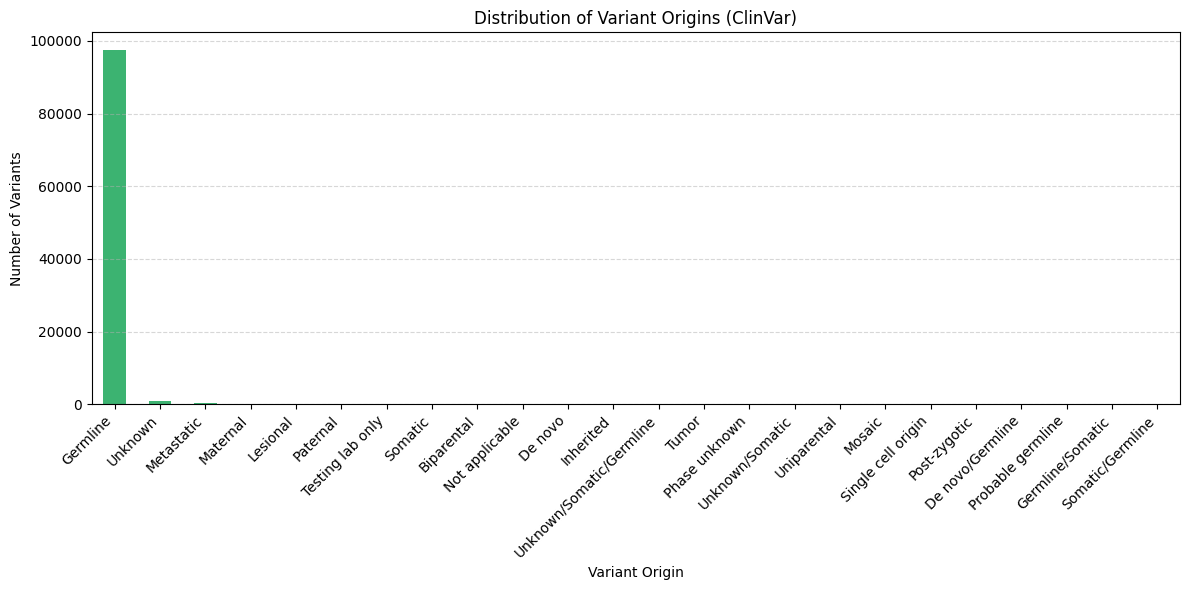

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the ORIGIN column
df_origin = df_clean[['ORIGIN']].dropna()

# Split if multiple values
df_origin['ORIGIN'] = df_origin['ORIGIN'].astype(str).str.split(',')
df_origin_exploded = df_origin.explode('ORIGIN')

# Mapping codes to full names
origin_map = {
    '0': 'Unknown',
    '1': 'Germline',
    '2': 'Somatic',
    '3': 'Inherited',
    '4': 'Maternal',
    '5': 'Paternal',
    '8': 'De novo',
    '9': 'Biparental',
    '13': 'Uniparental',
    '16': 'Not applicable',
    '17': 'Testing lab only',
    '21': 'Phase unknown',
    '24': 'Single cell origin',
    '25': 'Mosaic',
    '32': 'Metastatic',
    '33': 'Lesional',
    '34': 'Germline/Somatic',
    '35': 'Unknown/Somatic',
    '36': 'Somatic/Germline',
    '37': 'De novo/Germline',
    '40': 'Probable germline',
    '64': 'Tumor',
    '65': 'Unknown/Somatic/Germline',
    '69': 'Post-zygotic'
}

# Apply map
df_origin_exploded['ORIGIN_DESC'] = df_origin_exploded['ORIGIN'].map(origin_map)

# Count frequencies
origin_counts = df_origin_exploded['ORIGIN_DESC'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
origin_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Distribution of Variant Origins (ClinVar)')
plt.xlabel('Variant Origin')
plt.ylabel('Number of Variants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
df_clean['ORIGIN'].unique()

array(['0', '1', '32', '9', '33', '5', '17', '65', '4', nan, '64', '16',
       '8', '2', '37', '21', '3', '35', '25', '24', '40', '69', '13',
       '34', '36'], dtype=object)